<a href="https://colab.research.google.com/github/melisacaputo/datascience/blob/main/ProyectoFinal%2BCaputo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🎶 **Características musicales y su relación con la cantidad de reproducciones** 🎶



# **Abstract**


En la era digital, la música se volvio más accesible que nunca gracias a plataformas como Spotify. Detrás de la aparente simplicidad de escuchar una canción en línea, se esconde un mundo de datos y características musicales que influyen en la cantidad de reproducciones.

El objetivo de este proyecto es realizar un análisis detallado de las tendencias y patrones musicales de los últimos tiempos para elaborar un modelo de Machine Learning que permita predecir el éxito de una canción.







---


🔊 **Pregunta objetivo**


¿Qué características debe tener una canción para ser exitosa en cuanto a su cantidad de reproducciones?

---




---


🔊 **Contexto comercial**

Con este proyecto, se espera ayudar a la industria musical a tomar decisiones más informadas y precisas en cuanto a la producción y promoción de nuevos lanzamientos, lo que en última instancia beneficiará a plataformas de streaming, discograficas, artistas y oyentes.


---





---


🔊 **Problema comercial**

Se plantean algunas preguntas base para llevar a cabo el análisis solicitado.

* ¿Cómo se distribuye la cantidad de streams en Spotify? ¿Cuántas reproducciones suelen tener las canciones más exitosas?
* ¿Se pueden identificar relaciones de dependencia entre las distintas características musicales?
* ¿Quiénes son los artistas que tienen mayor popularidad en la plataforma?
* ¿Cómo influye el género musical en la cantidad de reproducciones? ¿Existen géneros que tienden a ser más populares que otros?
* ¿Cuál es el impacto de la duración de una canción en su éxito en Spotify? ¿Suelen ser más exitosas las canciones más cortas?
* ¿Existen patrones en la popularidad de las canciones lanzadas en días específicos de la semana o en ciertos meses del año?


---





---


🔊 **Contexto análitico**

La plataforma Spotify nos proporciona un dataset que contiene información muy útil para nuestro proyecto.

El dataset original contaba con una cantidad muy numerosa de registros ya que contenia el ranking diario de Spotify de los años 2017 y 2018 para cada región del mundo. Para simplificar el análisis y optimizar el rendimiento de memoria, se trabajará con un nuevo dataset filtrado por la región estadounidense como muestra de la población total.

Se cuenta con 22 columnas, que incluyen variables como la posición en las listas, el nombre de la canción, el artista, la cantidad de streams y el día del ranking. Además, se dispone de datos sobre características musicales como danzabilidad, energía, tonalidad, entre otras.

Se parte de la hipótesis de que existen características musicales específicas que tienen una influencia significativa en el éxito en streaming de las canciones. Se espera que variables como la danzabilidad, energía y valencia tengan una correlación positiva con la cantidad de streams.

Se emplearán herramientas y algoritmos de aprendizaje automático para desarrollar modelos que busquen predecir el éxito de una canción en función de sus características musicales. Además del análisis cuantitativo, se crearán visualizaciones y técnicas de análisis exploratorio de datos que permitirán comprender mejor la relación entre las variables y su influencia en la popularidad de las canciones.


---



# **Exploratory Data Analysis & Data Wrangling**

📚 Librerías:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

📊 Estilo de los gráficos:

In [ ]:
mpl.style.use('seaborn')
mpl.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['#00bb2d'])
sns.set_style(rc={"axes.labelsize": "10"})

📂 Importación del dataset:

In [ ]:
df = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vRSbxW53joz0J2_sB9wz_k-QgZT9aPSvET2DXjb8ILMMSJVEAMyaTE-BKRZW96GRHNmWrn_JyAn-n0q/pub?gid=1509851203&single=true&output=csv")

In [ ]:
df.head()

,position,track_name,artist,streams,url,year,month,day,region,danceability,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,1,Bad and Boujee (feat. Lil Uzi Vert),Migos,1371493,https://open.spotify.com/track/4Km5HrUvYTaSUfi...,2017,1,1,us,927.0,...,-5.313,1,244.00,61.0,0.0,123.0,175.0,127.076,343150,4
1,2,Fake Love,Drake,1180074,https://open.spotify.com/track/343YBumqHu19cGo...,2017,1,1,us,927.0,...,-9.433,0,0.42,108.0,0.0,196.0,605.0,133.987,210937,4
2,3,Starboy,The Weeknd,1064351,https://open.spotify.com/track/5aAx2yezTd8zXrk...,2017,1,1,us,681.0,...,-7.028,1,282.00,165.0,3.49e-06,134.0,535.0,186.054,230453,4
3,4,Closer,The Chainsmokers,1010492,https://open.spotify.com/track/7BKLCZ1jbUBVqRi...,2017,1,1,us,748.0,...,-5.599,1,338.00,414.0,0.0,111.0,661.0,95.010,244960,4
4,5,Black Beatles,Rae Sremmurd,874289,https://open.spotify.com/track/6fujklziTHa8uoM...,2017,1,1,us,794.0,...,-6.163,1,649.00,142.0,0.0,128.0,355.0,145.926,291893,4


📑 Diccionario de variables:

In [ ]:
df.columns

Index(['position', 'track_name', 'artist', 'streams', 'url', 'year', 'month',
       'day', 'region', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature'],
      dtype='object')

* **position** - posición en el ranking en ese día.
* **streams** - número de reproducciones en ese día.
* **year** - año del ranking.
* **month** - mes del ranking.
* **day** - día del ranking.
* **danceability** - que tan bailable es una canción (0.0 - 1.0).
* **energy** - medida de intensidad y actividad. Las canciones energéticas son rápidas y ruidosas (por ejemplo Death Metal), mientras que un preludio de Bach tendría una intensidad baja.
* **key** - clave de la canción. Los valores que toma son Do (0), Do#/♭ (1), Re (2) ... hasta Si(11). Si no se pudo detectar, el valor es -1.
* **loudness** - media del ruido de una canción (en dB).
* **mode** - modalidad de la canción - Menor (0) o Mayor (1).
* **speechiness** - presencia de palabras habladas en la pista de audio. Por encima de 0.66 son audios donde hay casi exclusivamente voz. Entre 0.66 y 0.33 entran canciones que combinan tanto música como voz (por ejemplo, el rap). Por debajo de 0.33 estaría la música y otros audios sin voz.
* **acousticness** - confianza de que una canción sea más o menos acústica (vs digital).
* **instrumentalness** - si una canción contiene o no instrumentos.
* **liveness** - si una canción se ha grabado "en vivo" o no, por encima de 0.8 es muy probable que sea en vivo.
* **valence** - positivismo de una canción. Cuando el valor es cercano a 1.0 la canción es más alegre, mientras que las canciones con valencia baja tienden a ser más tristes.
* **tempo** - el tempo medio estimado en "beats per minute" (BPM), es sinónimo de la velocidad de una canción.
* **duration_ms** - duración total del track.
* **time_signature** - compás medio del track, mide las pulsaciones que hay por cada compás.


In [ ]:
df.drop("url", axis=1, inplace=True)
df.drop("region", axis=1, inplace=True)

Se elimina la variable 'url' por no tener relevancia para nuestro análisis y la variable 'region' ya que previamente se filtró por una sola región para achicar el volumen del dataset.


🔍 Compruebo que los tipos de datos sean correctos:

In [ ]:
df.dtypes

position              int64
track_name           object
artist               object
streams               int64
year                  int64
month                 int64
day                   int64
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness     object
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature        int64
dtype: object

🛠️ Corrijo los tipos de datos de acuerdo a la descripción de las variables:

In [ ]:
df["track_name"] = df["track_name"].astype("category")
df["artist"] = df["artist"].astype("category")
df['instrumentalness'] = df['instrumentalness'].str.replace(',', '.').apply(lambda x: float(x))

In [ ]:
df.dtypes

position               int64
track_name          category
artist              category
streams                int64
year                   int64
month                  int64
day                    int64
danceability         float64
energy               float64
key                    int64
loudness             float64
mode                   int64
speechiness          float64
acousticness         float64
instrumentalness     float64
liveness             float64
valence              float64
tempo                float64
duration_ms            int64
time_signature         int64
dtype: object

🔍 Compruebo la cantidad de nulos por columna:

In [ ]:
df.isna().sum()

position            0
track_name          8
artist              8
streams             0
year                0
month               0
day                 0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
dtype: int64

Se encuentra que solo las columnas 'track_name' y 'artist' tienen datos faltantes, con una cantidad de 8 datos faltantes cada una. Dado el volúmen del dataset y que son variables difíciles de reemplazar por ser categóricas, lo mejor es eliminar las filas por completo.

In [ ]:
df.dropna(inplace=True)
df.shape

(72692, 20)

🔍 Compruebo si existe algún duplicado en el dataset:

In [ ]:
df.duplicated().any()

False

📈 Análisis de cardinalidad:

In [ ]:
variables_categoricas = df.select_dtypes(include=['object', 'category'])
cardinalidad = pd.DataFrame({'Cantidad': variables_categoricas.nunique(), 'Porcentaje': (variables_categoricas.nunique()) / (variables_categoricas.shape[0]) * (100)})
cardinalidad

,Cantidad,Porcentaje
track_name,1853,2.549111
artist,404,0.555770


La cardinalidad de los datos parece ser correcta basándonos en la descripción de las variables. Es común que haya una variedad grande de nombres de canciones en el dataset, sin embargo la cardinalidad se mantiene baja porque una canción puede estar varios días en el ranking. Por otro lado, contamos con 404 artistas diferentes en el dataset.

📈 Análisis estadístico - variables numéricas:

In [ ]:
df.describe().round(2)

,position,streams,year,month,day,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,72692.00,72692.00,72692.0,72692.00,72692.00,72692.00,72692.00,72692.00,72692.00,72692.00,72692.00,72692.00,72692.00,72692.00,72692.00,72692.00,72692.00,72692.00
mean,50.50,552589.22,2017.5,6.53,15.70,633.57,547.70,5.28,-6.63,0.60,379.91,358.68,49.78,313.36,421.97,122.63,211432.17,3.98
std,28.87,346044.27,0.5,3.45,8.77,262.99,225.56,3.76,12.55,0.49,244.74,252.95,157.40,302.68,239.89,28.87,44886.39,0.19
min,1.00,192102.00,2017.0,1.00,1.00,0.24,0.18,0.00,-898.00,0.00,0.03,0.00,0.00,0.08,0.04,46.72,31200.00,1.00
25%,26.00,337790.00,2017.0,4.00,8.00,587.00,454.00,1.00,-7.62,0.00,191.00,161.00,0.00,112.00,257.00,98.96,186293.00,4.00
50%,51.00,447471.00,2018.0,7.00,16.00,712.00,585.00,5.00,-6.31,1.00,351.00,282.00,0.00,162.00,419.00,124.00,210376.00,4.00
75%,76.00,640133.00,2018.0,10.00,23.00,797.00,711.00,8.00,-5.02,1.00,532.00,544.00,0.00,407.00,591.00,142.93,233705.00,4.00
max,100.00,5749019.00,2018.0,12.00,31.00,972.00,982.00,11.00,175.00,1.00,999.00,996.00,993.00,999.00,998.00,232.69,728413.00,5.00


📈 Análisis estadístico - variables categóricas:

In [ ]:
df.describe(include="category")

,track_name,artist
count,72692,72692
unique,1853,404
top,XO TOUR Llif3,Post Malone
freq,607,3858


#### 💡 Enriquecimiento del dataset mediante API

Una de las variables más importantes a la hora de analizar el éxito de una canción es su género musical, variable que no se encuentra disponible en el dataset original pero si lo está en la API oficial de Spotify.

Para poder consumir datos desde la API de Spotify, cree una aplicación vinculada con mi cuenta en la plataforma y usare la librería spotipy para facilitar la interacción y autenticación con mis credenciales.

In [ ]:
pip install spotipy

In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

client_id = '1ad7b6cbca594481aa3fd170116a9bcc'
client_secret = os.environ["CLIENT_SECRET_ID"]
redirect_uri = 'http://localhost:3000'

credentials = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=credentials)

In [ ]:
def get_genre(artist_name):
    try:
        results = sp.search(q=f'artist:{artist_name}', type='artist')
        artist = results['artists']['items'][0]

        if artist['genres']:
            return artist['genres'][0]
        else:
            return None
    except Exception as e:
        return None

In [ ]:
df['genre'] = df['artist'].apply(get_genre)

In [ ]:
df.head()

,position,track_name,artist,streams,year,month,day,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre
0,1,Bad and Boujee (feat. Lil Uzi Vert),Migos,1371493,2017,1,1,927.0,665.0,11,...,1,244.00,61.0,0.000000,123.0,175.0,127.076,343150,4,atl hip hop
1,2,Fake Love,Drake,1180074,2017,1,1,927.0,488.0,9,...,0,0.42,108.0,0.000000,196.0,605.0,133.987,210937,4,canadian hip hop
2,3,Starboy,The Weeknd,1064351,2017,1,1,681.0,594.0,7,...,1,282.00,165.0,0.000003,134.0,535.0,186.054,230453,4,canadian contemporary r&b
3,4,Closer,The Chainsmokers,1010492,2017,1,1,748.0,524.0,8,...,1,338.00,414.0,0.000000,111.0,661.0,95.010,244960,4,pop
4,5,Black Beatles,Rae Sremmurd,874289,2017,1,1,794.0,632.0,0,...,1,649.00,142.0,0.000000,128.0,355.0,145.926,291893,4,melodic rap


#### 📊 Distribución de la cantidad de streams

In [ ]:
df['streams'].describe().round(0)

count      72692.0
mean      552589.0
std       346044.0
min       192102.0
25%       337790.0
50%       447471.0
75%       640133.0
max      5749019.0
Name: streams, dtype: float64

In [ ]:
stats.describe(df.streams)

DescribeResult(nobs=72692, minmax=(192102, 5749019), mean=552589.2183871678, variance=119746635734.18922, skewness=3.2854682948913654, kurtosis=18.86317652020229)

A simple vista, los resultados estadísticos indican que la distribución es asimétrica hacia la derecha, con una alta concentración de datos alrededor de la media y valores extremos que contribuyen a la asimetría y la curtosis. La varianza es considerable, lo que indica una dispersión significativa de las cantidades de reproducciones.






In [ ]:
stats.variation(df.streams)*100

62.62190370874458

El valor del coeficiente de variación es mayor a 30% lo que nos indica que los datos son heterogéneos, es decir que la media no es una buena representación para este conjunto y que debemos tener cuidado al seleccionar muestras aleatorias de la población.

Text(0.5, 1.0, 'Distribución de la variable streams')

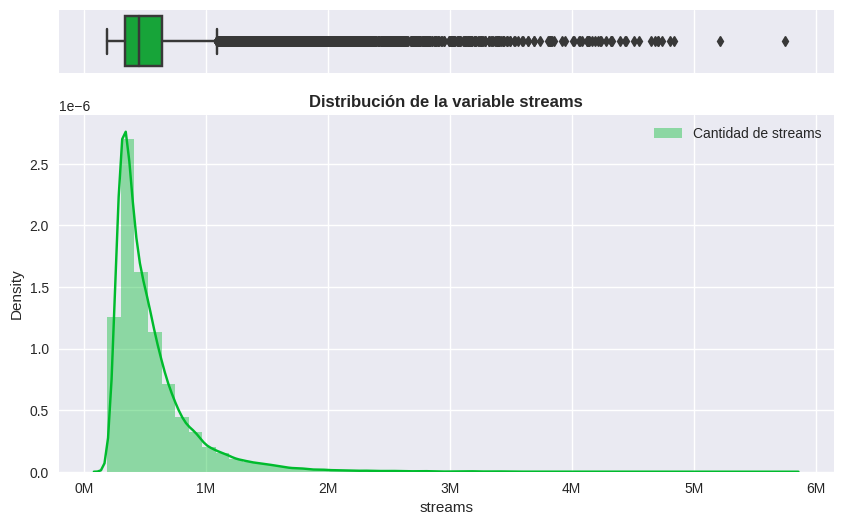

In [ ]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(10,6), gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(df['streams'], ax=ax_box, orient="h")
sns.distplot(df['streams'], ax=ax_hist, label='Cantidad de streams')
ax_hist.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.0f}M'.format(x * 1e-6)))
ax_box.set(yticks=[])
ax_hist.legend()
plt.title('Distribución de la variable streams')

Al analizar la distribución de los streams, se observa que la mayoría de las canciones tienen una cantidad de streams por debajo de los 2M. Esto se refleja en el histograma asimétrico a la derecha, donde se ve una concentración de canciones en el rango más bajo de streams. Sin embargo, el boxplot revela una presencia significativa de valores atípicos por encima de los 2M streams. Estos puntos negros representan un número considerable de canciones con un alto número de streams, incluso superando los 5M.

Este contraste entre la mayoría de canciones con un bajo número de streams y la presencia de un grupo notable de canciones con un alto número de streams puede deberse a diferentes factores como éxitos internacionales, temas virales o lanzamientos de artistas populares.

In [ ]:
median = np.median(df.streams)
mad = np.median(np.abs(df.streams - median))
threshold = 3.5
outliers = df.streams[np.abs(df.streams- median) / mad > threshold]
print("Outliers detectados por el Método de las Desviaciones Absolutas Medianas (MAD):")
print(outliers)

Outliers detectados por el Método de las Desviaciones Absolutas Medianas (MAD):
0        1371493
1        1180074
2        1064351
3        1010492
100      1161746
          ...   
72604    1341344
72605    1200764
72606    1178128
72607    1134708
72608    1096165
Name: streams, Length: 8009, dtype: int64


Usando el umbral máximo para la detección se encontraron 8009 de outliers en el dataset, número considerable pero a la vez razonable teniendo en cuenta el tamaño de la población.

In [ ]:
outliers = df[df['streams'] > 5000000]
columnas_interes = ['streams', 'day', 'month', 'year', 'track_name', 'artist']
tabla = outliers[columnas_interes]
print(tabla.reset_index(drop=True))

   streams  day  month  year track_name artist
0  5749019   29      6  2018    Nonstop  Drake
1  5219711   29      6  2018   Survival  Drake


Si acotamos la interpretación de outliers a partir de lo observado en el boxplot, vemos dos registros que son significativamente atípicos.


Investigando más detalladamente estos registros, se encontró que ambos coinciden con la fecha de lanzamiento del álbum 'Scorpion' del rapero candiense Drake, su álbum más exitoso hasta el momento.


#### 💿 Características musicales


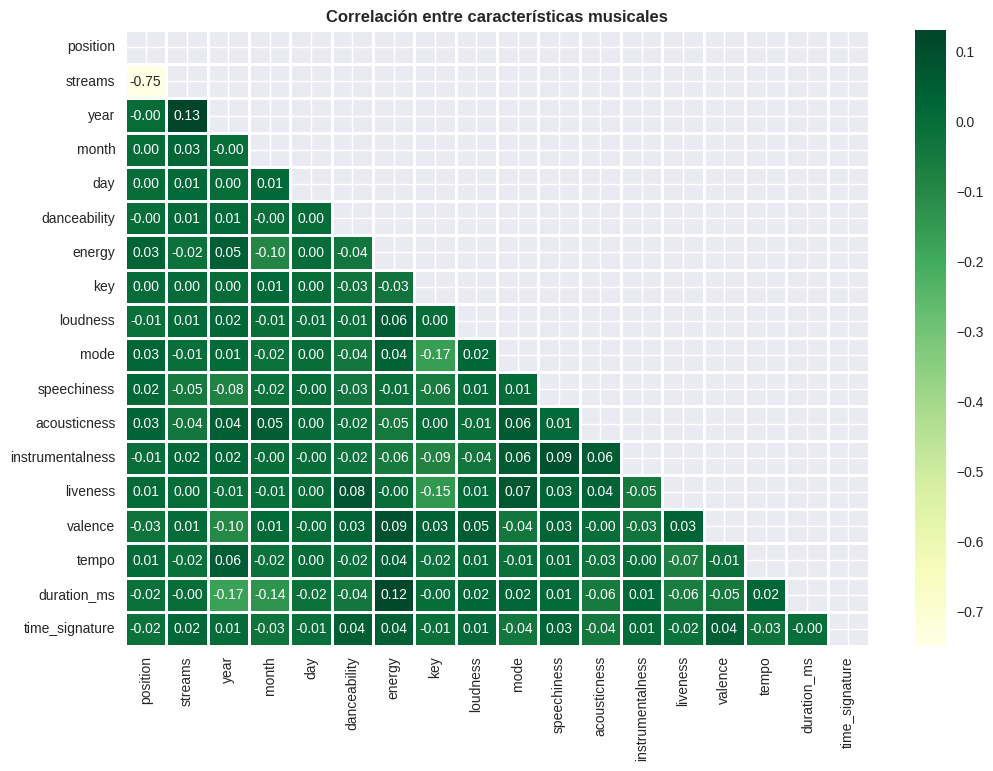

In [ ]:
plt.figure(figsize=(12,8))
mask = np.triu(np.ones_like(df.corr(), dtype = bool))
sns.heatmap(df.corr(), mask=mask, lw=1, annot=True, cmap="YlGn", fmt=".2f")
plt.title('Correlación entre características musicales')
plt.show()

En la matriz de correlaciones de nuestro dataset podemos ver que no existen correlaciones lineales ***fuertes*** entre las variables y tampoco al compararlas con la cantidad de streams, salvo por la posición del ranking, cosa que tiene sentido ya que es una variable que depende directamente de la cantidad de reproducciones.
A continuación se realizará un análisis más detallado con foco en las correlaciones significativas ***debiles***, tomando como referencia las que se encuentran por encima de un valor absoluto de 0.1.

* mode vs. key

In [ ]:
correlation, p_value = stats.spearmanr(df['mode'], df['key'])
print("Correlación de Spearman:", correlation)
print("Valor p:", p_value)

Correlación de Spearman: -0.1536977521589516
Valor p: 0.0


Se seleccionó la correlación de Sprearman por tratarse de dos variables ordinales. La correlación de Spearman revela una relación negativa significativa entre 'mode' y 'key', aunque la magnitud de la correlación es moderada. Esto significa que, en general, hay una tendencia a que las canciones en un modo musical particular (mayor o menor) tengan una tonalidad (key) diferente.

Por otro lado, tomando un nivel de significancia de 0.05, el valor p asociado con esta correlación sugiere que la relación entre 'mode' y 'key' es estadísticamente significativa. En otras palabras, es muy poco probable que esta correlación sea el resultado del azar.


* liveness vs. key

In [ ]:
correlation, p_value = stats.pearsonr(df['liveness'], df['key'])
print("Correlación de Pearson:", correlation)
print("Valor p:", p_value)

Correlación de Pearson: -0.14807540191540447
Valor p: 0.0


Estos resultados indican que hay una tendencia a que las canciones con mayor valor en 'liveness' tengan una tonalidad (key) diferente, y esta relación es estadísticamente significativa. Sin embargo, como en el caso anterior, la magnitud de la correlación es moderada, lo que significa que hay múltiples factores que influyen en la elección de la tonalidad de una canción además de su nivel de "liveness".

* duration_ms vs. energy

In [ ]:
correlation, p_value = stats.pearsonr(df['duration_ms'], df['energy'])
print("Correlación de Pearson:", correlation)
print("Valor p:", p_value)

Correlación de Pearson: 0.11732297162789579
Valor p: 4.2126279984090094e-221


La correlación de Pearson entre las variables 'duration_ms' y 'energy' es 0.117. Esto indica una correlación positiva débil entre estas dos variables. Cuando la duración en milisegundos de una canción aumenta, la energía tiende a aumentar ligeramente, y viceversa.

El valor p asociado a esta correlación es extremadamente pequeño, lo que sugiere que la probabilidad de que esta correlación sea el resultado del azar es prácticamente nula.


#### 🎤 Artistas populares

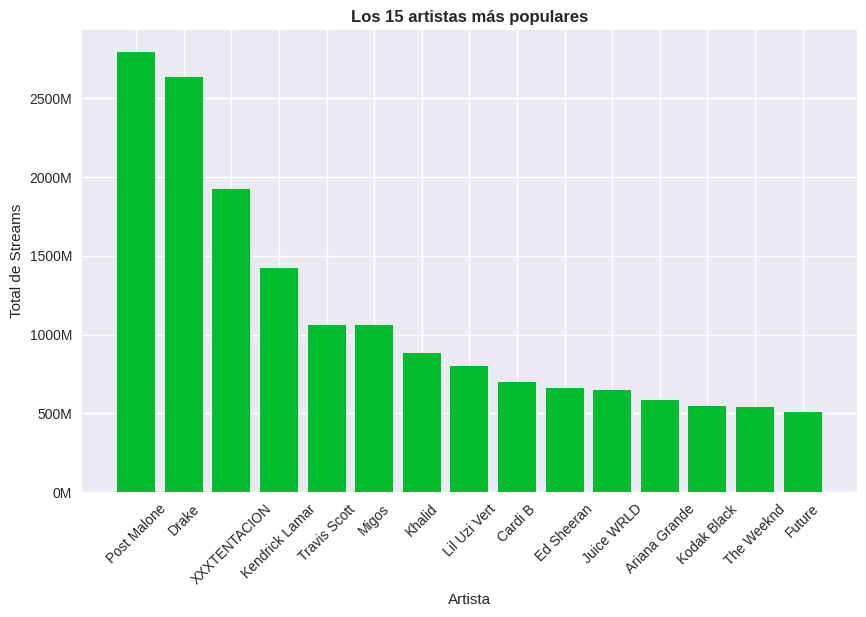

In [ ]:
popularidad_artista = df.groupby('artist')['streams'].sum().reset_index()
top_artistas = popularidad_artista.sort_values(by='streams', ascending=False).head(15)

plt.figure(figsize=(10, 6))
plt.bar(top_artistas['artist'], top_artistas['streams'])
plt.xlabel('Artista')
plt.ylabel('Total de Streams')
plt.title('Los 15 artistas más populares')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:.0f}M'.format(x / 1e6)))
plt.show()

A partir del gráfico podemos observar que ciertos artistas tienen una presencia dominante en términos de popularidad, ya que su número total de streams es significativamente mayor que el de otros artistas.

Con un poco de conocimiento en el negocio, podemos inferir que la mayoría de artistas ubicados en el top 15 pertenecen al género Hip Hop / Rap, por lo que si varios de estos artistas pertenecen a la misma discográfica o tienen conexiones cercanas, podría haber oportunidades de colaboración entre ellos para aumentar el éxito de sus canciones.

#### 🎧 Géneros populares

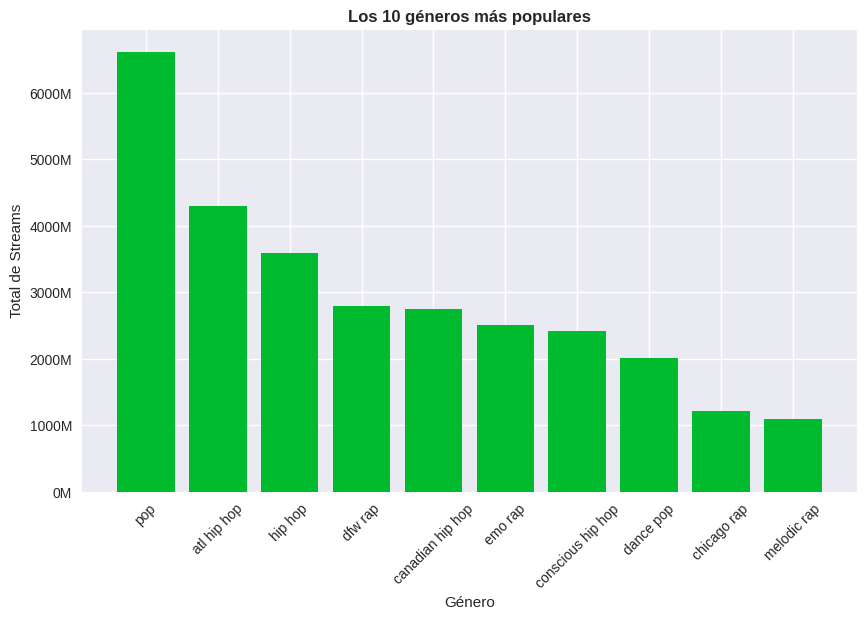

In [ ]:
popularidad_genero = df.groupby('genre')['streams'].sum().reset_index()
top_generos = popularidad_genero.sort_values(by='streams', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_generos['genre'], top_generos['streams'])
plt.xlabel('Género')
plt.ylabel('Total de Streams')
plt.title('Los 10 géneros más populares')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:.0f}M'.format(x / 1e6)))
plt.show()

Tal como inferimos a partir de los artistas más populares, vemos que las diferentes variantes de Hip Hop y Rap se encuentran entre los géneros más populares.


Además, vemos también una presencia significativa del pop, lo que hace sentido debido a que el nombre del género es una abreviación de la palabra "popular".


#### ⌛ Duración de las canciones

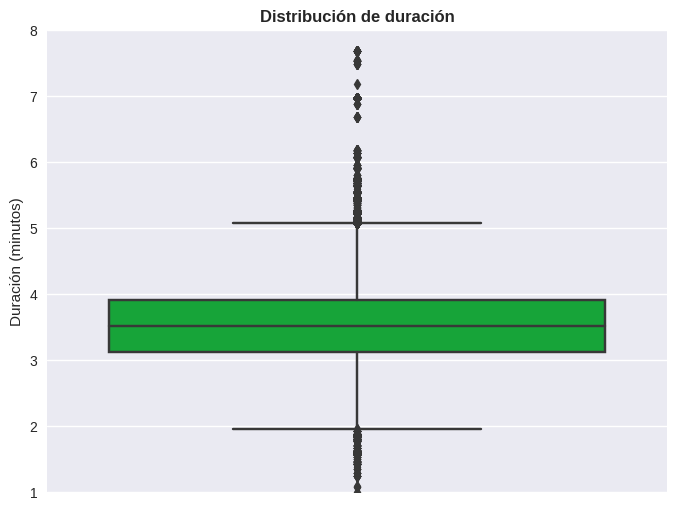

In [ ]:
df['duration_min'] = df['duration_ms'] / 60000

duration_range = (1, 8)
df_filtered = df[(df['duration_min'] >= duration_range[0]) & (df['duration_min'] <= duration_range[1])]

plt.figure(figsize=(8, 6))
sns.boxplot(data=df_filtered, y='duration_min',  color='#00bb2d')

plt.ylim(duration_range[0], duration_range[1])

plt.title('Distribución de duración')
plt.ylabel('Duración (minutos)')

plt.show()

El gráfico muestra la distribución de la duración de canciones en minutos, limitada a un rango de 1 a 8 minutos para facilitar el análisis.

Podemos observar que la mayoria de las canciones tienen una duración de entre 3 a 4 minutos.

Text(0, 0.5, 'Reproducciones (M)')

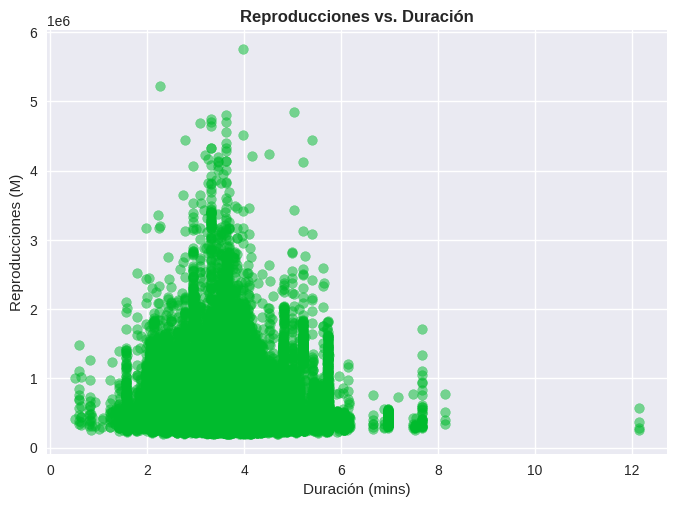

In [ ]:
duration = df['duration_min'].values.flatten()
streams = df['streams']

fig, ax = plt.subplots()
ax.scatter(duration, streams, alpha = 0.5)

ax.set_title('Reproducciones vs. Duración')
ax.set_xlabel('Duración (mins)')
ax.set_ylabel('Reproducciones (M)')

Podemos comprobar que las canciones con una duración promedio tienen más posibilidades de ser exitosas, mientras que las canciones con corta o larga duración no consiguen más de 2M reproducciones.

#### 🗓️ Streamings por mes


In [ ]:
df['year'].unique()

array([2017, 2018])

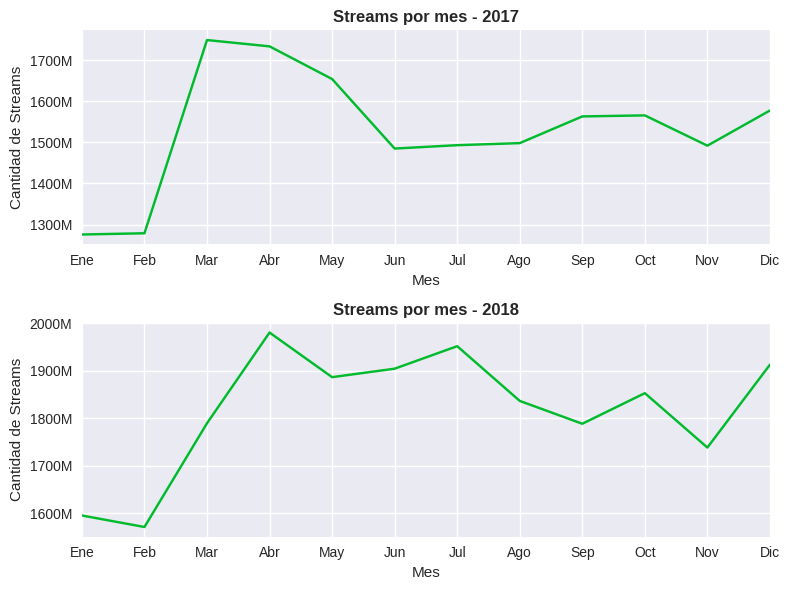

In [ ]:
streams_mensuales = df.groupby(['year', 'month'])['streams'].sum().reset_index()
years = [2017, 2018]

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 6))

for i, year in enumerate(years):
    data = streams_mensuales[streams_mensuales['year'] == year]
    axes[i].plot(data['month'], data['streams'])
    axes[i].set_title(f'Streams por mes - {year}')
    axes[i].set_xlabel('Mes')
    axes[i].set_ylabel('Cantidad de Streams')
    axes[i].set_xlim(1, 12)
    axes[i].set_xticks(np.arange(1, 13, 1))
    axes[i].set_xticklabels(['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
    axes[i].yaxis.set_major_locator(ticker.MultipleLocator(100000000))
    axes[i].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.0f}M'.format(x * 1e-6)))  # formato de millones para el eje y

plt.tight_layout()
plt.show()

En general, se observa que la cantidad de streams en el año 2018 fue mayor en comparación con el año 2017. Esta diferencia se destaca desde el inicio, ya que la escala del eje y para el año 2018 comienza en 1600M, casi alcanzando el valor máximo de streams del año 2017.

De todas formas, ambos años muestran un patrón similar en la evolución de la cantidad de streams durante los primeros meses del año. Los primeros dos meses tienen la menor cantidad de streams, lo que podría deberse a las tendencias de consumo durante las vacaciones o días festivos. Luego, se observa un aumento exponencial en ambos años, alcanzando su punto máximo en marzo para el año 2017 y en abril para el año 2018.

Después de alcanzar los picos, en el año 2017 se ve una caída progresiva que llega a su punto mínimo en junio de 2017 y luego se mantiene con cierta estabilidad hasta fin de año con un aumento más significativo en diciembre. En el caso del año 2018, el período de estabilidad se mantiene desde abril hasta julio, con una caída pronunciada en los meses de agosto y septiembre. Se recupera ligeramente en octubre, pero luego vuelve a caer en noviembre. Finalmente, hay una recuperación con un notorio aumento en diciembre. Estos resultados podrían estar influenciados por diversos factores, como el lanzamiento de nuevos álbumes, eventos de la industria musical, campañas de promoción, entre otros.

En conclusión, lo más útil para nuestro análisis sería enfocarnos en los primeros meses del año, en los que parece repetirse un patrón con picos bastante marcados. De todas formas, sería conveniente tener información de otros años para fundamentar.

#### 🗓️ Streamings por día de la semana


Text(0, 0.5, 'Cantidad de Streams')

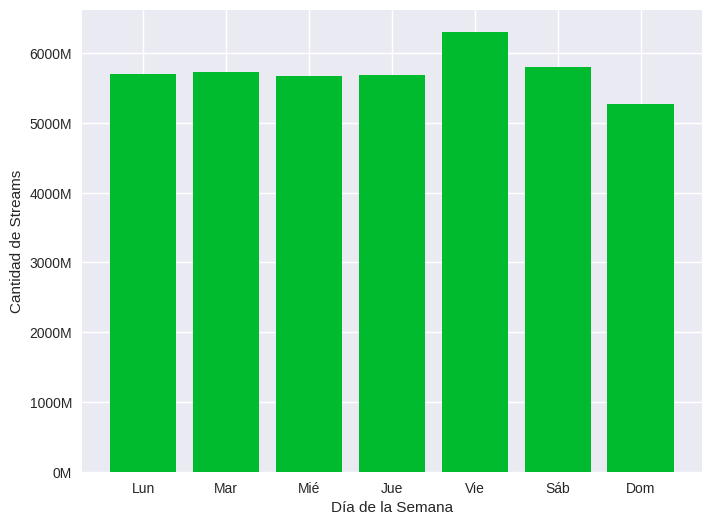

In [ ]:
df['date'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str) + '-' + df['day'].astype(str))
df['day_of_week'] = df['date'].dt.dayofweek
streams_diarios = df.groupby('day_of_week')['streams'].sum().reset_index()
dias_semana = ['Lun', 'Mar', 'Mié', 'Jue', 'Vie', 'Sáb', 'Dom']

plt.figure(figsize=(8, 6))
plt.bar(streams_diarios['day_of_week'], streams_diarios['streams'])
plt.xticks(streams_diarios['day_of_week'], dias_semana)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.0f}M'.format(x * 1e-6)))
plt.xlabel('Día de la Semana')
plt.ylabel('Cantidad de Streams')

A partir del gráfico podemos inferir que los viernes son los mejores días para lanzar nuevas canciones, ya que la cantidad de streams es la más alta.

# **Modelo de regresión**

Voy a crear un modelo de regresión lineal para pedecir la cantidad de streams diaria que tendrá una canción con base en sus características.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
df.columns

Index(['position', 'track_name', 'artist', 'streams', 'year', 'month', 'day',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'genre', 'duration_min', 'date',
       'day_of_week'],
      dtype='object')

🔑 Defino características y variable objetivo:

In [ ]:
features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']
X = df[features]
y = df['streams']

⚙️ Divido los datos en conjuntos de entrenamiento (80%) y prueba (20%):

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

🤖 Creo y entreno al modelo de regresión lineal:

In [ ]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

🧠 Predicciones en el conjunto de entrenamiento:

In [ ]:
y_pred_train = lr.predict(X_train)

🧠 Predicciones en el conjunto de prueba:

In [ ]:
y_pred_test = lr.predict(X_test)

# **Evaluación del modelo**

📊 Estadísticas descriptivas para la variable streams:


In [ ]:
df['streams'].describe().round(0)

count      72692.0
mean      552589.0
std       346044.0
min       192102.0
25%       337790.0
50%       447471.0
75%       640133.0
max      5749019.0
Name: streams, dtype: float64

🔗 **ERROR MEDIO ABSOLUTO (MAE)**:

In [ ]:
from sklearn.metrics import mean_absolute_error
print("MAE TRAIN:", mean_absolute_error(y_train, y_pred_train))
print("MAE TEST:", mean_absolute_error(y_test, y_pred_test))

MAE TRAIN: 228734.66882204122
MAE TEST: 229288.68283886454


El valor medio de la variable streams es 552589, mientras que el MAE es aproximadamente la mitad de este valor. Esto sugiere que, en promedio, las predicciones del modelo se desvían en un grado significativo de los valores reales.

🔗 **ERROR CUADRÁTICO MEDIO (MSE)**:

In [ ]:
from sklearn.metrics import mean_squared_error
print("MSE TRAIN:", mean_squared_error(y_train, y_pred_train))
print("MSE TEST:", mean_squared_error(y_test, y_pred_test))

MSE TRAIN: 119031310082.994
MSE TEST: 119663957221.34273


El valor promedio de la variable streams es 552589, mientras que el MSE es considerablemente alto en comparación, lo que indica que las predicciones del modelo tienden a diferir de los valores reales en un grado importante.

🔗 **RAÍZ DEL ERROR CUADRÁTICO MEDIO (RMSE)**:

In [ ]:
print("RMSE TRAIN:", np.sqrt(mean_squared_error(y_train, y_pred_train)))
print("RMSE TEST:", np.sqrt(mean_squared_error(y_test, y_pred_test)))

RMSE TRAIN: 345009.14492661494
RMSE TEST: 345924.78549728513


El RMSE indica que las predicciones del modelo tienden a diferir en promedio alrededor de 345924 de los valores reales. Dado que la desviación estándar de la variable streams es 346044, podemos observar que el RMSE es comparativamente alto en relación con la variabilidad de los datos de la variable objetivo.

🔗 **COEFICIENTE DE LA RAÍZ CUADRADA DEL ERROR (R2)**:

In [ ]:
from sklearn.metrics import r2_score
print("R2 TRAIN:", r2_score(y_train, y_pred_train))
print("R2 TEST:", r2_score(y_test, y_pred_test))

R2 TRAIN: 0.004960175008577594
R2 TEST: 0.004676652152299399


Dado que el valor de R2 está cerca de cero, el modelo explica solo una fracción muy pequeña de la variabilidad total en la cantidad de streams y no está capturando bien las relaciones entre las características musicales y las cantidades de streams.

Basándonos en las conclusiones obtenidas a partir de las métricas de evaluación, podemos ver que las predicciones del modelo tienen errores significativos y que el modelo no está ajustando bien los datos, por lo que se entiende que estamos ante un caso de **underfitting**.  

El underfitting puede resolverse aplicando modelos más complejos, realizando un análisis más detallado de las características relevantes o considerando la inclusión de características adicionales para mejorar la calidad de las predicciones.

# **Mejorando el modelo**

Como se analizó anteriormente, el modelo no está teniendo una buena precisión. Por eso, una de las soluciones posibles que desarrollare es la de separar a las predicciones por género musical, partiendo desde la hipótesis de que dentro de un mismo género las variables tendrán mayor correlación.


Para trabajar con los géneros más representativos, primero vemos un detalle de los mismos:

In [ ]:
df['genre'].describe()

count     72548
unique      147
top         pop
freq      12488
Name: genre, dtype: object

In [ ]:
generos = df.groupby('genre').agg({'streams': 'sum', 'track_name': 'count'}).reset_index()
total_canciones = generos['track_name'].sum()
generos['Representatividad (%)'] = ((generos['track_name']/total_canciones)*100).round(2)
generos.rename(columns={'genre': 'Género', 'streams': 'Cantidad de Streams', 'track_name': 'Cantidad de Canciones'}, inplace=True)
top_generos = generos.nlargest(10, 'Cantidad de Streams')
top_generos

,Género,Cantidad de Streams,Cantidad de Canciones,Representatividad (%)
126,pop,6616824397,12488,17.21
14,atl hip hop,4293442184,8087,11.15
86,hip hop,3587251506,5777,7.96
60,dfw rap,2791306538,3858,5.32
36,canadian hip hop,2745895435,3609,4.97
71,emo rap,2511026217,4190,5.78
53,conscious hip hop,2417610340,3736,5.15
55,dance pop,2011003292,4006,5.52
41,chicago rap,1224666017,1924,2.65
108,melodic rap,1095873906,2431,3.35


Empezaremos probando los resultados del género más exitoso y representativo (pop):

In [ ]:
df_pop = df[df['genre'] == 'pop']

In [ ]:
matriz = df_pop.corr()

<Axes: >

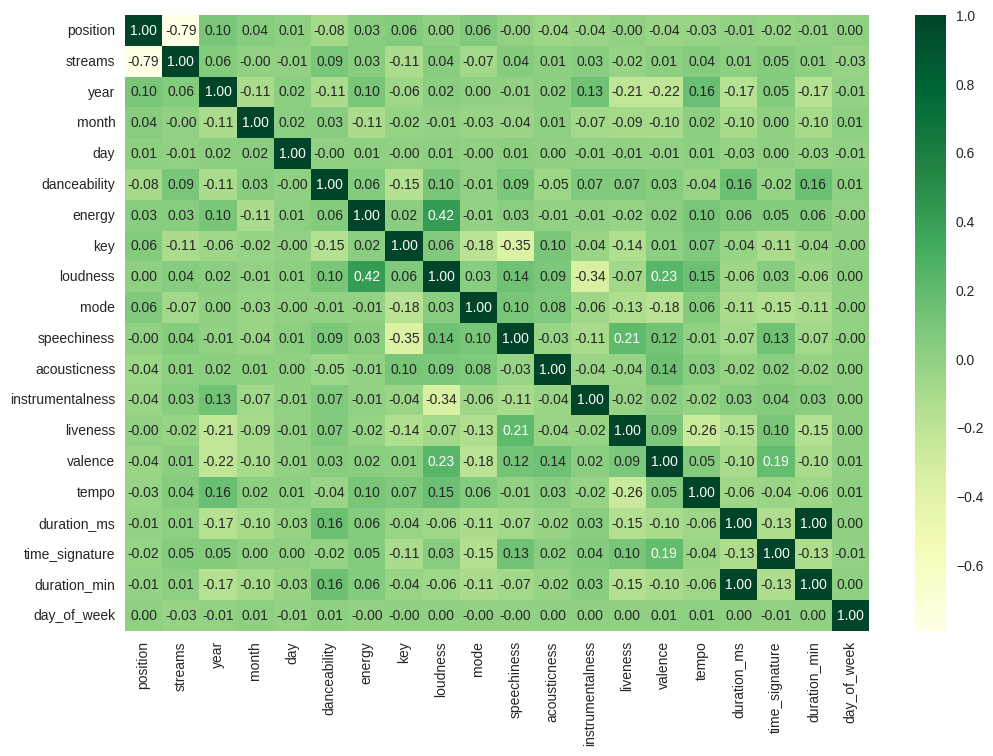

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(matriz, annot=True, cmap="YlGn", fmt=".2f")

🔑 Defino características y variable objetivo:

In [ ]:
features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']
X = df_pop[features]
y = df_pop['streams']

⚙️ Divido los datos en conjuntos de entrenamiento (80%) y prueba (20%):

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

🤖 Creo y entreno al modelo de regresión lineal:

In [ ]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

🧠 Predicciones en el conjunto de entrenamiento:

In [ ]:
y_pred_train = lr.predict(X_train)

🧠 Predicciones en el conjunto de prueba:

In [ ]:
y_pred_test = lr.predict(X_test)

🔗 **COEFICIENTE DE LA RAÍZ CUADRADA DEL ERROR (R2)**:

In [ ]:
print("R2 TRAIN:", r2_score(y_train, y_pred_train))
print("R2 TEST:", r2_score(y_test, y_pred_test))

R2 TRAIN: 0.03425355015289522
R2 TEST: 0.03578447054754863



Tal como se podía prever a partir de la matriz de correlación, los resultados mejoraron levemente en comparación con el modelo anterior, pero todavía hay oportunidad de mejora.

A continuación se volverá a crear el modelo para otro género musical un poco menos representativo, esperando que dé mejores resultados.


In [ ]:
df_melodic = df[df['genre'] == 'melodic rap']

In [ ]:
matriz = df_melodic.corr()

<Axes: >

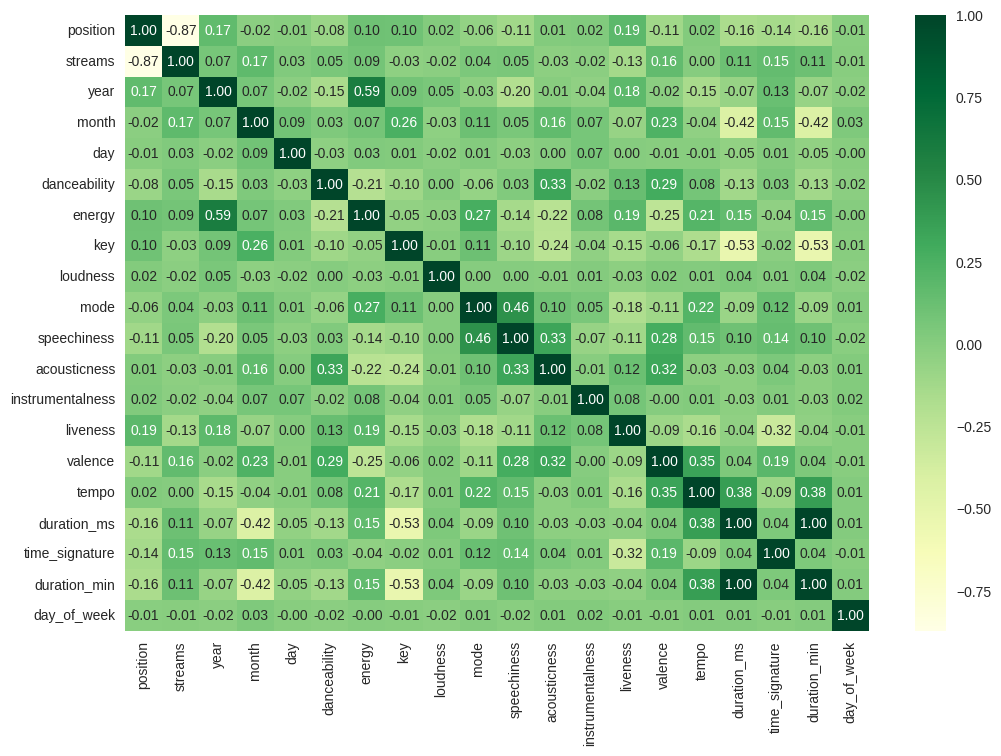

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(matriz, annot=True, cmap="YlGn", fmt=".2f")

🔑 Defino características y variable objetivo:

In [ ]:
features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']
X = df_melodic[features]
y = df_melodic['streams']

⚙️ Divido los datos en conjuntos de entrenamiento (80%) y prueba (20%):

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

🤖 Creo y entreno al modelo de regresión lineal:

In [ ]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

🧠 Predicciones en el conjunto de entrenamiento:

In [ ]:
y_pred_train = lr.predict(X_train)

🧠 Predicciones en el conjunto de prueba:

In [ ]:
y_pred_test = lr.predict(X_test)

In [ ]:
# COEFICIENTE DE LA RAÍZ CUADRADA DEL ERROR (R2)
print("R2 TRAIN:", r2_score(y_train, y_pred_train))
print("R2 TEST:", r2_score(y_test, y_pred_test))

R2 TRAIN: 0.12323186188139557
R2 TEST: 0.0874411817179177


En comparación, este último modelo supera al anterior en términos de su capacidad de explicar y predecir las variaciones en los datos. Este modelo tiene valores de R2 significativamente más altos.


Estos resultados responden de forma positiva a la hipótesis planteada de que dentro de un mismo género las variables tienen mayor correlación, logrando adaptarse más facilmente al modelo de regresión lineal. Por otro lado, se observa que cuanto más específico es el género, se obtienen mejores resultados. Esto puede deberse a que por lo general, los artistas de los géneros más populares como el rap o el pop, suelen mezclar una diversidad de géneros en sus canciones, mientras que los artistas de géneros más de "nicho" como el reggaeton o el country se mantienen fieles a sus géneros.